# Random Forest Applied to Predict Large Scale Precipitation 

Gebreab K.  Zedwie,
2018


In this jupyter notebook, the application of the Random Forest machine Learning method to predict large scale precipitation is presented.  The data is from the European Center for Medium-range Weather Forecast (ECMWF) and consisits of 29 predictors. 

## Names of Predictors 

Consists of atmospheric and land surafce parameters including cloud coverage,  wind speed and direction,  ozone, etc. Complete list will be published here!

I found the Random Forest robust in predicting and variable importance ranking! 


In [1]:
# let us now import important libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# let us now import the data saved in CSV format 
AllData=pd.read_csv('Data.csv')

The Data.csv file doesn't contain the header (when saved on matlab), which are the predictor names. Don't worry we can add the heder now.  

In [3]:
AllData.columns=['Low Vegetation Cover', 'High vegetation cover', 'Type of low vegetation', 
                 'Type of high vegetation', 'Surace Geospatial', 'Vol. soil water layer 1', 
                 'Volumetric soil water ayer 2', 'Surface air pressure','Total  column water',
                 'Total column water vapour', 'Surface temperature', 'Mean sea level Pressure', 
                 ' Total Cloud cover', '10 m U wind component', ' 10 m V wind component', 
                 '2 meter temeperature', '2 meter dew point temperature', 'Soil temperature level 2 ', 
                 'Surface roughness', 'Surface Albedo', 'Soil temperature level 3', 'low cloud cover',
                'Medium cloud cover', 'High cloud cover', 'Skin reservior content', 'Total Column Ozone',
                 'Log. of surface roghness for heart', ' Skin temperature', 
                 ' Soil temperature level 4','large scale precipitation']

In [4]:
# print the headers again to see  if it is correctly done
AllData.columns

Index(['Low Vegetation Cover', 'High vegetation cover',
       'Type of low vegetation', 'Type of high vegetation',
       'Surace Geospatial', 'Vol. soil water layer 1',
       'Volumetric soil water ayer 2', 'Surface air pressure',
       'Total  column water', 'Total column water vapour',
       'Surface temperature', 'Mean sea level Pressure', ' Total Cloud cover',
       '10 m U wind component', ' 10 m V wind component',
       '2 meter temeperature', '2 meter dew point temperature',
       'Soil temperature level 2 ', 'Surface roughness', 'Surface Albedo',
       'Soil temperature level 3', 'low cloud cover', 'Medium cloud cover',
       'High cloud cover', 'Skin reservior content', 'Total Column Ozone',
       'Log. of surface roghness for heart', ' Skin temperature',
       ' Soil temperature level 4', 'large scale precipitation'],
      dtype='object')

In [5]:
#Let us print some of the rows in the data 
AllData[0:5]

,Low Vegetation Cover,High vegetation cover,Type of low vegetation,Type of high vegetation,Surace Geospatial,Vol. soil water layer 1,Volumetric soil water ayer 2,Surface air pressure,Total column water,Total column water vapour,...,Soil temperature level 3,low cloud cover,Medium cloud cover,High cloud cover,Skin reservior content,Total Column Ozone,Log. of surface roghness for heart,Skin temperature,Soil temperature level 4,large scale precipitation
0,0.16578,0.83422,1,19,2272.6,0.26469,0.26620,99236.0,5.4083,273.86,...,279.97,0.000000,5.551100e-17,2.399300e-01,1.279300e-06,0.006973,-3.6667,274.21,285.85,0.000000
1,0.16578,0.83422,1,19,2272.6,0.29118,0.27578,98894.0,14.4100,277.32,...,279.60,0.365760,8.688500e-01,3.913700e-01,2.821800e-04,0.007175,-3.6667,274.75,285.70,0.000686
2,0.16578,0.83422,1,19,2272.6,0.29650,0.29316,99544.0,8.1391,274.99,...,279.44,0.744460,5.551100e-17,9.998700e-13,1.946900e-04,0.006496,-3.6667,273.27,285.55,0.000026
3,0.16578,0.83422,1,19,2272.6,0.29226,0.28998,99420.0,7.5108,274.03,...,279.28,0.206680,5.551100e-17,1.918100e-01,3.685600e-05,0.005712,-3.6667,275.66,285.41,0.000000
4,0.16578,0.83422,1,19,2272.6,0.29040,0.28796,98494.0,9.2449,278.30,...,279.13,0.006092,3.128200e-04,2.562400e-01,9.222200e-08,0.005779,-3.6667,281.10,285.26,0.000000


Now let us spend some time to see each predictor variable  and try to determine the relevance of each predictor variable for the problem.  While this might be a little time consuming it will give us see the flavour of each predictor and the data set in general!

In [6]:
# Let us start looking at the predictand variable,  the large scale precipitation (precipitaion for simplicity).


In [7]:
#descriptive statistics summary for precipitation 
AllData['Low Vegetation Cover'].describe()

count    10226.00000
mean         0.16578
std          0.00000
min          0.16578
25%          0.16578
50%          0.16578
75%          0.16578
max          0.16578
Name: Low Vegetation Cover, dtype: float64

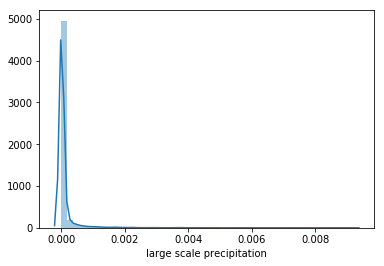

In [8]:
#histogram plot of precipitation
sns.distplot(AllData['large scale precipitation'])


(0, 200)

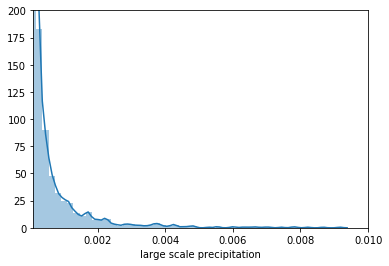

In [9]:
#To get a better sense of the data
sns.distplot(AllData['large scale precipitation'])
plt.xlim(0.0001, 0.01)
plt.ylim(0,200)

Note! the zero large scale precipitation implies the dry days ( apparently no on these days) and the unit of the preciptation data in this is m. We need to multipy by 1000 to find it value in mm. Also, the distibution largely right skewed  

In [10]:
#let us see the skewness of the distribution 
print("Skewness: %f" % AllData['large scale precipitation'].skew())
print("Kurtosis: %f" % AllData['large scale precipitation'].kurt())

Skewness: 9.460366
Kurtosis: 118.444286


(0.0001, 0.02)

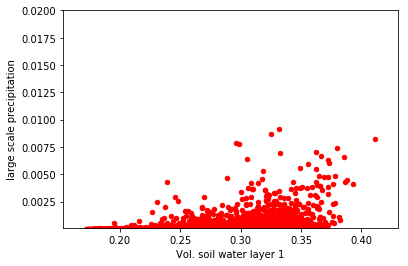

In [11]:
#scatter plot grlivarea/saleprice
isvar = 'Vol. soil water layer 1'
data = pd.concat([AllData['large scale precipitation'], AllData[isvar]], axis=1)
data.plot.scatter(x=isvar, y='large scale precipitation',c='red');
plt.ylim(0.0001,0.02)

Now we can change  "isvar" above   with each predictor variable and see its relationship with the daily precipitation. However we have to come up  with a better way of showing all predictors' relation with predicatand at the same time in one plot.  The best choice in this case is to calcuale the correlation matrix and map it. The seaborn heatmap is the best canddate to  map the correlation matrix. 

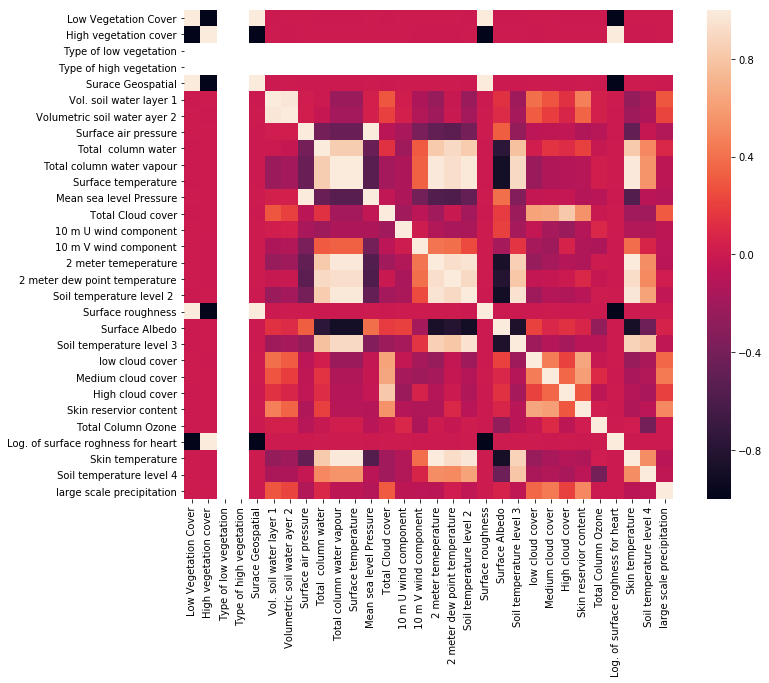

In [12]:
# calculate and map the correlation matrix
corrmatrix = AllData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, square=True)
#sns.heatmap(corrmatrix, cmap="YlGnBu")


We observe from the above map that some variables are constant at all times (at least nearly constant!).  An Example such variable is type of low vegetation and type of  high vegetation. Some variables are highly correlated with each other (Examples can be log. of surface roughness for heat anf low vegetation cover, soil temperaure level 2 and 2 meter temperature). If two predictor variables are highly corrrelated with each other they adversely affect the machine learning. One of the variables has to be droped before training the machine learning.  

We will clean the above map by droping varibales that are not important, for example varaibles that are constant at all times, variables that are NAN,  one of the two varibles that are highly correlated with each other and so on. But let us first apply the **random forest machine learning method** roughly without removing these varibles. Later we will clean our data and reapply the Random Forest or other machine learning methods. 

## Random Forest for Predicting Precipitation 

In [13]:
#Our Data 
print("Shape of all the data: {}" .format(AllData.shape))
testall=AllData['large scale precipitation']
trainall=AllData.drop('large scale precipitation',axis=1)

print("Shape of the predictand (precipitation): {}".format(testall.shape))
print("Shape of the training data: {}".format(trainall.shape))

Shape of all the data: (10226, 30)
Shape of the predictand (precipitation): (10226,)
Shape of the training data: (10226, 29)


In [14]:
#Let us now import  the random Forest libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 



In [15]:
#Apply the random forest training
regr = RandomForestRegressor(max_depth=100, random_state=0)
mdl=regr.fit(trainall,testall)


In [16]:
# Well we did the fiting,  now let us do the prediction using the same data we trained our machine learning 
ytest=mdl.predict(trainall)
cc=np.corrcoef(testall,ytest)

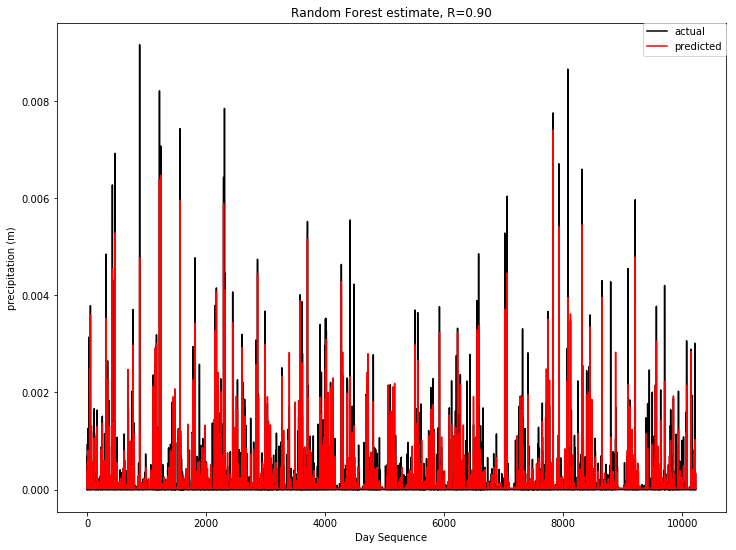

In [17]:
# Let us now plot the predicted value and the supervising variable (precipitation) together
fig = plt.figure(figsize=(12, 9))
plt.plot(testall, label="actual", c='black') 
plt.plot(ytest,label="predicted", c='red')
plt.xlabel('Day Sequence')
plt.ylabel('precipitation (m)')
plt.title('Random Forest estimate, R=' "%.2f" %  cc[0,1])
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()

In [18]:
print('The correlation coefficent between the actual and predicted values is {}'.format(cc[0,1]))

The correlation coefficent between the actual and predicted values is 0.8957509697007219


**The above figure is using the whole data.  Now let us apply indipendent cross-validation by partitioning the data** 

## Indipendent Validation 

In [19]:
#Partitioning the Data 
x_train, x_test, y_train, y_test = train_test_split(trainall, testall, random_state=0)
print("Shape of the training data: {}".format(x_train.shape))
print("Shape of the validation data: {}".format(x_test.shape))
print("Shape of the validation data: {}".format(y_train.shape))
print("Shape of the validation data: {}".format(y_test.shape))


Shape of the training data: (7669, 29)
Shape of the validation data: (2557, 29)
Shape of the validation data: (7669,)
Shape of the validation data: (2557,)


In [20]:
#train the random forest machine learning
mdl=regr.fit(x_train,y_train)
x_predict=mdl.predict(x_train)

cc_train=np.corrcoef(x_predict,y_train)
#print(cctr)

#predict and test for the indipendent validation data
y_predict=mdl.predict(x_test)
cc_valid=np.corrcoef(y_predict,y_test)

print('The correlation coefficent between the actual and predicted values for the training data  is {}'.format(cc_train[0,1]))
print('The correlation coefficent between the actual and predicted values for the indipendent validation  is {}'.format(cc_valid[0,1]))
      

The correlation coefficent between the actual and predicted values for the training data  is 0.8879786707518668
The correlation coefficent between the actual and predicted values for the indipendent validation  is 0.6653806492113495


The indipendet validation looks very good. Let's now plot the results!

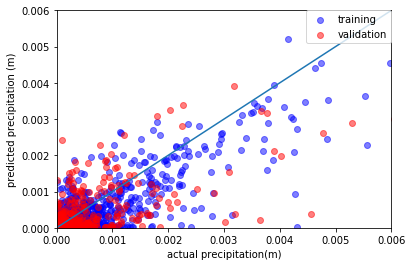

In [21]:
#scatter plot of the validation and traing
fig = plt.figure()
plt.plot([0, 0.006], [0,0.006]) # the  line passing through [0,0] and [1,1] 
plt.scatter(y_train, x_predict, c="b", alpha=0.5,label='training')
plt.scatter(y_test, y_predict, c="r", alpha=0.5, label='validation')
plt.xlim( (0, 0.006) )
plt.ylim((0,0.006))
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.xlabel('actual precipitation(m)')
plt.ylabel('predicted precipitation (m)')
plt.show()

Let us now plot the indipendet validation in a line

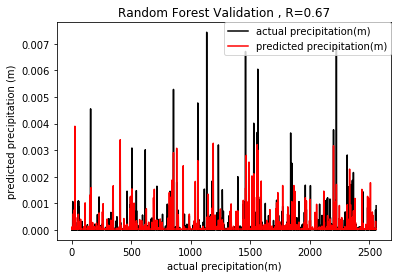

In [22]:
#Ploting the indipendent validation! 
plt.figure
plt.plot(y_test.values,c='black',label='actual precipitation(m)')
plt.plot(y_predict, c='red', label="predicted precipitation(m)")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title('Random Forest Validation , R=' "%.2f" %  cc_valid[0,1])
plt.xlabel('actual precipitation(m)')
plt.ylabel('predicted precipitation (m)')
plt.show()

# Clearn unncessary predictors and apply the Random Forest 

Now let us remove predictors that are constant or nearly constant at all times,  remove one of the predictors that is highly correlated with another preditor. 
 
 *continueing ...*